1. DWI PURBO SAFITRI
2. SALSABILA ZHAFRANY
3. HISNA ABIDAH
4. RIVATUL HASANAH
5. AHMAD IRFAN
6. MOCH. YAZID AL B.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [53]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes (1).csv


In [54]:
import pandas as pd

data = pd.read_csv('diabetes.csv')
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [56]:
data['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [57]:
correlation = data.corr()

correlation['Outcome'].sort_values(ascending=False)

,Outcome
Outcome,1.000000
Glucose,0.466581
BMI,0.292695
Age,0.238356
Pregnancies,0.221898
DiabetesPedigreeFunction,0.173844
Insulin,0.130548
SkinThickness,0.074752
BloodPressure,0.065068


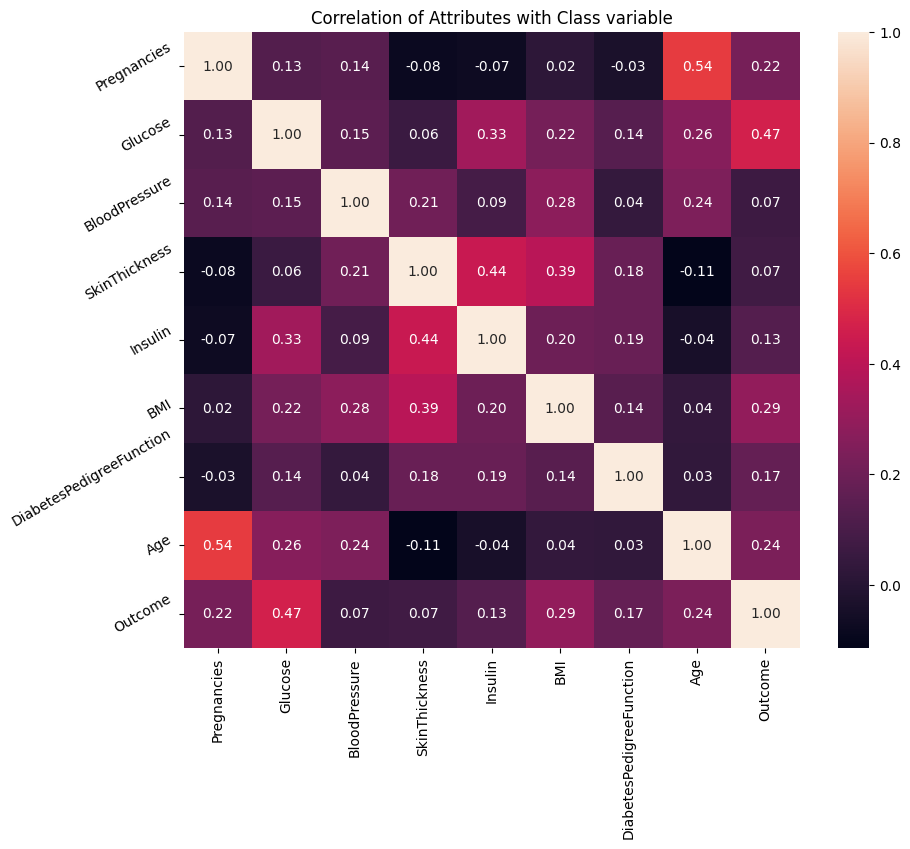

In [58]:
import seaborn as sns

plt.figure(figsize=(10,8))

plt.title('Correlation of Attributes with Class variable')

a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')

a.set_xticklabels(a.get_xticklabels(), rotation=90)

a.set_yticklabels(a.get_yticklabels(), rotation=30)

plt.show()

In [59]:
X = data.drop(['Outcome'], axis=1)

y = data['Outcome']

In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7, random_state = 2)

X_train.shape, X_test.shape

((230, 8), (538, 8))

In [79]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
33,0.639947,-0.904316,1.183596,-1.288212,-0.692891,-1.534781,-0.857340,-0.445935
237,-1.141852,1.818535,1.080200,0.405445,-0.692891,1.536665,0.646679,-0.871374
705,0.639947,-1.279882,0.563223,0.969998,-0.692891,0.990912,-0.890561,-0.445935
282,0.936914,0.378867,0.976805,-0.347291,0.652958,0.051710,-0.633851,0.319855
362,0.342981,-0.560048,2.010760,1.032726,-0.692891,0.914761,-0.503986,2.702312
...,...,...,...,...,...,...,...,...
534,-0.844885,-1.373774,-0.677523,0.593630,-0.206648,0.165937,2.353046,-0.786286
584,1.233880,0.097192,0.356432,0.217261,4.516847,-0.417892,0.649699,1.596171
493,0.046014,0.128489,0.046245,-0.159107,0.366423,-0.392508,2.029893,1.000557
527,-0.250952,-0.153185,0.253036,-0.347291,0.218813,-0.722498,-1.101970,-0.786286


In [80]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
158,-0.547919,-1.029505,0.253036,-0.096379,-0.232697,-0.379816,-0.733515,-0.956462
251,-0.547919,0.253678,0.770014,-1.288212,-0.692891,-0.506735,-0.567409,-0.531023
631,-1.141852,-0.591345,0.459827,1.220910,0.088570,0.318240,-0.706334,-0.786286
757,-1.141852,0.065895,0.149641,-1.288212,-0.692891,0.546695,-0.645932,1.596171
689,-0.844885,0.723135,0.666618,1.597279,0.870031,1.790503,-0.413383,1.085644
...,...,...,...,...,...,...,...,...
531,-1.141852,-0.434859,0.356432,-1.288212,-0.692891,1.688968,0.646679,-0.786286
469,0.639947,1.036107,0.459827,1.283638,0.522715,1.790503,0.299365,-0.531023
127,-0.844885,-0.090591,-0.574128,0.969998,0.123302,0.165937,-0.636871,-0.871374
719,0.342981,-0.747831,0.356432,0.405445,-0.692891,0.457851,-0.283518,1.596171


In [81]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5,weights='distance',metric='euclidean')

knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', weights='distance')

In [82]:
y_pred = knn.predict(X_test)

y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,

In [83]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7138


In [85]:
y_pred_train = knn.predict(X_train)

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 1.0000


In [86]:
print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.7138


In [87]:
y_test.value_counts()

,count
Outcome,
0,355
1,183


In [88]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[293  62]
 [ 92  91]]

True Positives(TP) =  293

True Negatives(TN) =  91

False Positives(FP) =  62

False Negatives(FN) =  92


<Axes: >

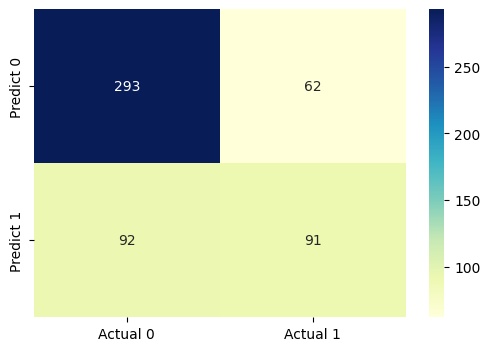

In [89]:
plt.figure(figsize=(6,4))

cm_matrix = pd.DataFrame(cm, columns=['Actual 0', 'Actual 1'], index=['Predict 0', 'Predict 1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [90]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79       355
           1       0.59      0.50      0.54       183

    accuracy                           0.71       538
   macro avg       0.68      0.66      0.67       538
weighted avg       0.70      0.71      0.71       538



In [91]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn, X, y, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.64935065 0.77922078 0.71428571 0.71428571 0.71428571 0.75324675
 0.72727273 0.85714286 0.69736842 0.75      ]


In [92]:
print('Average cross-validation score: {:.2f}'.format(scores.mean()))

Average cross-validation score: 0.74
